# The Methane-Hydrate Equation of State

In [1]:
import iapws_boundaries
import methane_hydrate
import gas_eos
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

Visualizing this is quite difficult. This notebook hopes to make it easier to understand phase diagrams with multiple species.

In [24]:
P_crit = 4.5992e6
T_crit = 190.56
T_melt = 90.55
P_trip = 0.011696e6

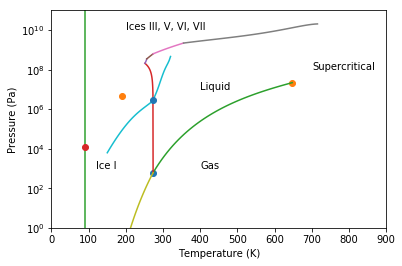

In [25]:
iapws_boundaries.plot_boundaries()
methane_hydrate.plot_boundaries()
plt.semilogy(T_crit,P_crit,'o')
plt.plot([T_melt,T_melt],[1,1e11])
plt.plot(T_melt,P_trip,'o')
plt.xlim(0,900)
plt.show()

In [3]:
gas_eos.pressure_peng_robinson(1,500)

array(14353239.23455167)

In [4]:
T_min, T_max = 200, 500
p_min, p_max = 1e4, 1e8
data = []
for t in np.linspace(T_min,T_max,100):
    rho0 = gas_eos.rho_peng_robinson(p_min,t)
    rho1 = gas_eos.rho_peng_robinson(p_max,t)
    rhos = np.linspace(rho0,rho1,100)
    ps = gas_eos.pressure_peng_robinson(rhos,t)
    tslice= t*np.ones(100)
    data.append(np.vstack([tslice,ps,rhos]).T)
data = np.vstack(data)

In [5]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

## Methane

In [6]:
data

array([[2.00000000e+02, 1.00000000e+04, 1.73804486e-03],
       [2.00000000e+02, 1.02334321e+06, 1.77926678e-01],
       [2.00000000e+02, 2.03594794e+06, 3.54115312e-01],
       ...,
       [5.00000000e+02, 9.79795661e+07, 6.86506574e+00],
       [5.00000000e+02, 9.89897321e+07, 6.93583244e+00],
       [5.00000000e+02, 1.00000000e+08, 7.00659915e+00]])

In [7]:
macro = lambda D,c, **kwargs : go.Scatter3d(x=D[:,0],y=(D[:,1]),z=D[:,2],surfacecolor=c,
                                            mode='markers',marker={'size':2},**kwargs)
plot_data = [macro(data,'green')]
layout = go.Layout(scene=dict(
    xaxis=dict(
        title='T',
    ),
    yaxis=dict(
        title='log(p)'
    ),
    zaxis=dict(
        title='rho'
    )
))
fig = go.Figure(data=plot_data,layout=layout)

In [8]:
py.iplot(fig)

## Interactive Diagram

On the left, put water, on the right, put methane. Put a slider that changes X